In [24]:
# Import libraries

import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math

In [31]:
# Define blending funcitons from ioflo

def blend0(d = 0.0, u = 1.0, s = 1.0): #trapezoidal
    d = float(abs(d))
    u = float(abs(u))
    s = float(abs(s))
    v = d - u #offset by radius

    if v >= s:  #first so if s == 0 catches here so no divide by zero below
        b = 0.0
    elif v <= 0.0:
        b = 1.0
    else: # 0 < v < s
        b = 1.0 - (v / s)
    return b

def blend1(d = 0.0, u = 1.0, s = 1.0): # sigmoidal
    v = float(abs(u * s)) #scale uncertainty radius make sure positive
    a = float(abs(d)) #symmetric about origin

    if a >= v or v == 0.0 : #outside uncertainty radius accept delta
        b = 1.0
    elif a < v/2.0: # inside 1/2 uncertainty radius closer to 0
        b = 2.0 * (a * a)/(v * v)
    else: #greater than 1/2 uncertainty radius closer to 1
        b = 1.0 - (2.0 * (a - v) * (a - v))/ (v * v)
        
    return b

def blend2(d = 0.0, u = 1.0, s = 5.0): # gaussian
    d = float(d)
    u = float(u)
    s = float(abs(s)) # make sure positive

    b = 1.0 - math.exp( - s * (d * d)/(u * u))

    return b

def blend3(d = 0.0, u = 1.0, s = 0.05): # polynomial
    d = float(d)
    u = float(u)
    s = min(1.0,float(abs(s))) # make sure positive <= 1.0

    b = 1.0 - s ** ((d * d)/(u * u))

    return b

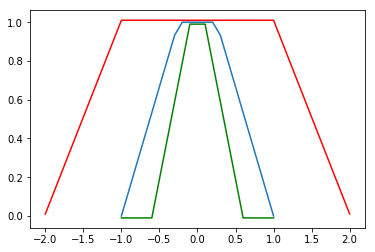

In [27]:
# Plot and display tests results of the blend0() funciton

ss = 0.1 # step size
s = .75  # uncertainty(?)
u = .25  # radius
out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend0(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blend0(i[x])
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1]+.01)
plt.plot(xCoord, yCoord, color='red')

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend0(i[x], 0.1, 0.5)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1]-.01)
plt.plot(xCoord, yCoord, color='green')

plt.show()

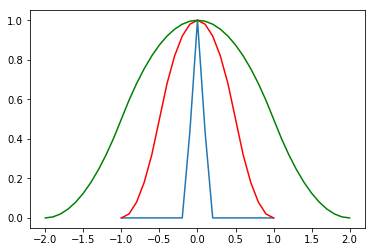

In [28]:
# Plot and display tests results of the blend1() funciton

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend1(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(1-out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend1(i[x])
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(1-out[i][1])
plt.plot(xCoord, yCoord, color='red')

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blend1(i[x], 1, 2)
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(1-out[i][1])
plt.plot(xCoord, yCoord, color='green')

plt.show()

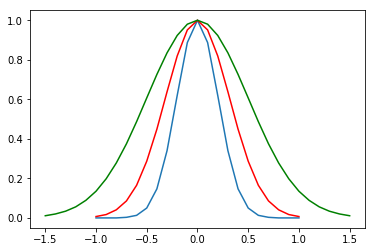

In [29]:
# Plot and display tests results of the blend2() funciton

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend2(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(1-out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend2(i[x])
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(1-out[i][1])
plt.plot(xCoord, yCoord, color='red')

out = []
i = np.linspace(-1.5,1.5,31)
for x in range(len(i)):
    b = blend2(i[x], 1, 2)
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(1-out[i][1])
plt.plot(xCoord, yCoord, color='green')

plt.show()

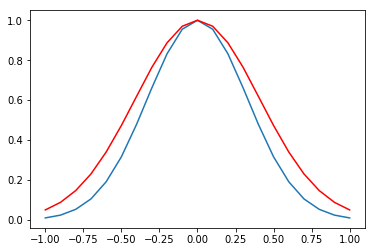

In [23]:
# Plot and display tests results of the blend3() funciton

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend3(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(1-out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend3(i[x])
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(1-out[i][1])
plt.plot(xCoord, yCoord, color='red')


plt.show()

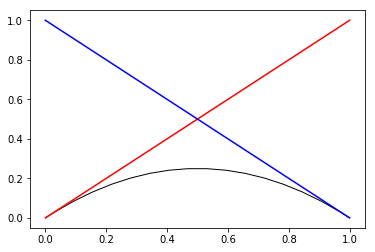

In [13]:
# Just testing

Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(0, 0), (0.5, 0.5), (1, 0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3]),
    fc="none", transform=ax.transData)

ax.add_patch(pp1)
plt.plot([0,1], [0,1], color='red')
plt.plot([0,1], [1,0], color='blue')


plt.show()

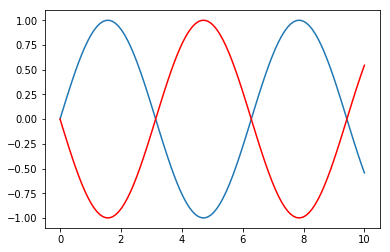

In [30]:
# Just testing

x = np.linspace(0,10,100)
y = np.sin(x)
z = -np.sin(x)
plt.plot(x,y)
plt.plot(x,z, color='red')

plt.show()

In [113]:
def blendTrapezoid(d = 0.0, u = 1.0, s = 1.0, tri = False): #trapezoidal
    d = float(abs(d))
    u = float(abs(u))
    s = float(abs(s))
    v = d - u #offset by radius

    if v >= s:  #first so if s == 0 catches here so no divide by zero below
        b = 0.0
    elif v <= 0.0 and tri == False:
        b = 1.0
    elif v <= 0.0:
        b = 1.0 - (v / s)
    else: # 0 < v < s
        b = 1.0 - (v / s)
    return b

def blendCauchian(d = 0.0, u = 1.0, s = 0.0, cat = 2.0): # Cauchian
    d = float(d)
    u = float(u)
    s = float(abs(s)) # make sure positive

    if u == 0:  # don't divide by zero. 
        return 0
    b = 1.0 / ( 1 + abs(d-s/u) ** (2*cat) )

    return b

def blendSigmoid(d = 0.0, u = .01, s = 2): # sigmoidal
    v = float(abs(u * s)) 
    a = float(abs(d)) #symmetric about origin
    e = 2.71828 # not an exact way of using base e
    
    b = 1 / (1 + e ** (s * (u-d) ))

    return b

def blend2(d = 0.0, u = 1.0, s = 5.0): # gaussian
    d = float(d)
    u = float(u)
    s = float(abs(s)) # make sure positive

    b = 1.0 - math.exp( - s * (d * d)/(u * u))

    return b


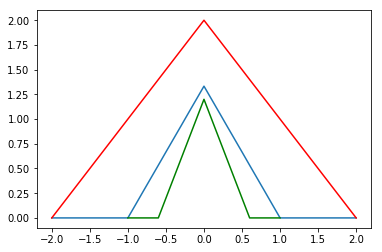

In [43]:
# Plot and display tests results of the blendTrapezoid() funciton

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blendTrapezoid(i[x],u,s, tri=True)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blendTrapezoid(i[x], tri=True)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord, color='red')

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blendTrapezoid(i[x], 0.1, 0.5, tri=True)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord, color='green')

plt.show()

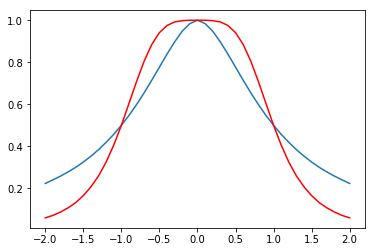

In [83]:
# Plot and display tests results of the blendCauchian() funciton

u = 2
s = 0

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blendCauchian(i[x],u,s,0.9)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blendCauchian(i[x])
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord, color='red')

plt.show()

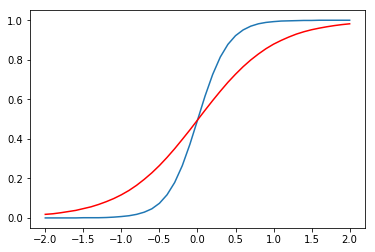

In [114]:
# Plot and display tests results of the blendSigmoid() funciton

u = 0.005
s = 5

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blendSigmoid(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blendSigmoid(i[x])
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord, color='red')

plt.show()